In [25]:
import numpy as np # linear algebra
import pandas as pd
np.random.seed(42)

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
stop_words = set(stopwords.words('english'))


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# decide which class is the minority, which is the majority
minority_class = "q-fin"
majority_class = "stat"

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/stat-q-fin/stat_q-fin.csv


In [ ]:
def get_metadata():
    with open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 'r') as f:
        for paper in f:
            yield paper

In [ ]:
metadata = get_metadata()
for paper in metadata:
    for k, v in json.loads(paper).items():
        print(f'{k}: {v}')
    break

In [ ]:
paper

In [ ]:
# import os
# os.listdir("/kaggle/input/stat-q-fin")

In [26]:

papers_df = pd.DataFrame(columns=["category", "title", "abstract", "last_update_date"])


# 'quantitative finance' : 'q-fin',
# 'statistics' : 'stat'
relevant_categories = [minority_class, majority_class]

if relevant_categories != ["q-fin", "stat"]:
    
    metadata = get_metadata()
    # The pattern to use in order to find formulas in a text (str)
    formula_pattern = r'\$.*?\$'

    i = 0
    for paper in tqdm(metadata):

        paper = json.loads(paper)
        categ = paper['categories']

        cur_categories = categ.split()
        main_categs = [categ.split(".")[0] for categ in cur_categories]

        main_categs = " ".join(main_categs)

        if np.array([rel_categ in main_categs for rel_categ in relevant_categories]).sum() == 0:
            continue

        for rel_category in relevant_categories:
            if rel_category in main_categs.split():
                main_categs = rel_category # Use only the first relevant category - it's the more important one between the relevant categories
                break
        i += 1


        last_update_date = paper["update_date"]
        title = paper['title'].replace("\n", " ").replace("  ", " ")
        abstract = paper['abstract'].replace("\n", " ").replace("  ", " ")
        replacement = 'formula'

        abstract = re.sub(formula_pattern, replacement, abstract)
    #     title = re.sub(formula_pattern, replacement, title)

        cur_row = pd.DataFrame({"category":[main_categs], "title":[title], "abstract":[abstract], "last_update_date":[last_update_date]})
        papers_df = pd.concat([papers_df, cur_row], axis=0).reset_index(drop=True)


    papers_df["year_update_date_int"] = papers_df["last_update_date"].str.split("-").str[0].astype(int)
    papers_df["texts"] = papers_df["title"] + ": " + papers_df["abstract"]


    papers_df["category_binary"] = (papers_df["category"] == minority_class_binary).astype(int)
    papers_df["category_binary"]

else:
    papers_df = pd.read_csv("/kaggle/input/stat-q-fin/stat_q-fin.csv", index_col=0)
    
papers_df

,category,title,abstract,last_update_date,year_update_date_int,texts,category_binary
0,stat,Spline Single-Index Prediction Model,"For the past two decades, single-index model,...",2007-05-23,2007,Spline Single-Index Prediction Model: For the...,0
1,stat,On generalized entropy measures and pathways,"Product probability property, known in the li...",2009-11-13,2009,On generalized entropy measures and pathways: ...,0
2,stat,Solutions of fractional reaction-diffusion equ...,This paper deals with the investigation of th...,2008-09-16,2008,Solutions of fractional reaction-diffusion equ...,0
3,q-fin,Approximation of the distribution of a station...,We build a sequence of empirical measures on ...,2011-05-31,2011,Approximation of the distribution of a station...,1
4,q-fin,Average optimality for risk-sensitive control ...,This paper deals with discrete-time Markov co...,2016-08-14,2016,Average optimality for risk-sensitive control ...,1
...,...,...,...,...,...,...,...
122527,stat,Accardi contra Bell (cum mundi): The Impossibl...,An experimentally observed violation of Bell'...,2011-11-09,2011,Accardi contra Bell (cum mundi): The Impossibl...,0
122528,stat,"Time, Finite Statistics, and Bell's Fifth Posi...",I discuss three issues connected to Bell's th...,2015-01-15,2015,"Time, Finite Statistics, and Bell's Fifth Posi...",0
122529,stat,The statistical strength of nonlocality proofs,There exist numerous proofs of Bell's theorem...,2011-11-09,2011,The statistical strength of nonlocality proofs...,0
122530,stat,"On Quantum Statistical Inference, II",Interest in problems of statistical inference...,2011-11-09,2011,"On Quantum Statistical Inference, II: Interes...",0


In [27]:
size_mb = papers_df.memory_usage().sum() / (1024 * 1024)

# Print the size
print("Size of the DataFrame: {:.2f} MB".format(size_mb))

Size of the DataFrame: 7.48 MB


In [ ]:
# papers_df.to_csv("stat_q-fin.csv")

In [28]:
print(f"The % of each category:\n{papers_df.groupby('category').count()['title']/len(papers_df)}")

The % of each category:
category
q-fin    0.13767
stat     0.86233
Name: title, dtype: float64


# Class of fit and predict

In [31]:
class BinaryPaperClassifierModel:

    def __init__(self, vector_embedding_size=100, window_embedding=5, min_count_embedding=5, preprocess_func=None, classification_model_type="NN"):
        """
        Initialized the model object, does not train it.
        """        
        self.classification_model_type = classification_model_type
        self.preprocess_func = preprocess_func
        self.vector_embedding_size = vector_embedding_size
        self.window_embedding = window_embedding
        self.min_count_embedding = min_count_embedding
        self.model = None
        self.w2v_model = None
        
        
    def fit(self, X_train, y_train):
        """
        X_train is a pandas series object, not a pandas dataframe
        Fits a model using the init parameters. 
            including:  1. Preprocessing function
                        2. Training a Word2Vec
                        3. Training of a model by classification_model_type.
                        
        The trained model is the self.
        returns None
        """

        if self.preprocess_func:
            X_train = tqdm(X_train.apply(self.preprocess_func), total=len(X_train))
        
        sentences = [sentence.split() for sentence in X_train]
        
        w2v_model = Word2Vec(sentences, 
                     vector_size=self.vector_embedding_size, 
                     window=self.window_embedding, 
                     min_count=self.min_count_embedding)
        
        self.w2v_model = w2v_model
        
        def vectorize(sentence):
            words = sentence.split()
            words_vecs = [self.w2v_model.wv[word] for word in words if word in self.w2v_model.wv]
            if len(words_vecs) == 0:
                return np.zeros(self.vector_embedding_size)
            words_vecs = np.array(words_vecs)
            return words_vecs.mean(axis=0)
        
        self.vectorize = vectorize
        
        X_train = np.array([vectorize(sentence) for sentence in X_train])

        
        if self.classification_model_type == "NN":
            # Neural Network model
            import tensorflow as tf
            from tensorflow import keras
            
            X_train_np = np.array(X_train)
            y_train_np = np.array(y_train)

            nn_model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(X_train_np.shape[1],)),
                                               tf.keras.layers.Dense(256, activation="relu"),
                                               tf.keras.layers.Dense(32, activation="relu"),
                                               tf.keras.layers.Dense(1, activation="sigmoid")])

            # Add early stop
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)

            nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                             loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['binary_accuracy'])
            nn_model.fit(X_train_np, y_train_np, batch_size=32, epochs=40, shuffle=True, validation_split=0.2,
                         callbacks=[callback])

            self.model = nn_model
        
        elif self.classification_model_type == "CB":
            # CatBoost Classifier
            from catboost import CatBoostClassifier
            cb_model = CatBoostClassifier(depth=7, l2_leaf_reg=3, random_seed=42)
            cb_model.fit(X_train, (y_train).astype(int), verbose=100)
            self.model = cb_model
        
        elif self.classification_model_type == "RF":
            # RandomForest Classifier
            from sklearn.ensemble import RandomForestClassifier
            rf_model = RandomForestClassifier(n_estimators=250, max_depth=7, random_state=42)
            rf_model.fit(X_train, (y_train).astype(int))
            self.model = rf_model

    
    def predict(self, X):
        """
        Inference on new data X, using the self for the preprocessing, Word2Vec and the ML trained model.
        Returns the predicted model scores after preprocessing the embedding.
        """
        if self.preprocess_func:
            X = tqdm(X.apply(self.preprocess_func), total=len(X))
        
        X = np.array([self.vectorize(sentence) for sentence in X])
        if self.classification_model_type == "NN":
            return self.model.predict(X).flatten() #because its a tensor
        
        return self.model.predict_proba(X)[:,1] # the column [0] has the scores of class 0.
      

        

In [32]:
X_train, X_test, y_train, y_test = train_test_split(papers_df[["texts"]].rename(columns={"texts":"text"}), papers_df[["category_binary"]].rename(columns={"category_binary":"label"})["label"], test_size=0.2, stratify=papers_df["category_binary"], random_state=42)
X_train = X_train[["text"]]
X_test = X_test[["text"]]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98025, 1), (24507, 1), (98025,), (24507,))

In [112]:
def evaluation_func(y_true, y_pred, model_type="NN"):
    eval_dict = {"accuracy":accuracy_score(y_true, y_pred),
                 "recall":recall_score(y_true, y_pred),
                 "precision":precision_score(y_true, y_pred),
                 "f1score":f1_score(y_true, y_pred)}
    
    for metric in eval_dict:
        print(f"The {metric} of the {model_type} Classifier is: {round(eval_dict[metric], 3)}")
    return eval_dict



def calculate_scores(group):
    y_true = group['label']
    y_pred = group['y_pred']
    accuracy_val = accuracy_score(y_true, y_pred)
    precision_val = precision_score(y_true, y_pred)
    recall_val = recall_score(y_true, y_pred)
    f1_score_val = f1_score(y_true, y_pred)
    count_obs = group.shape[0]
    perc_minority = y_true.mean()
    return pd.Series({"count":count_obs, "perc_minority":perc_minority, 'accuracy': accuracy_val, 'precision': precision_val, 'recall':recall_val, 'f1_score':f1_score_val})


In [40]:
def preprocess(text):
    """
    A preprocessing function we created for our texts. You may create another one as you wish.
    """
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

### Neural Network training + Predictions + Accuracy

In [41]:
nn_model = BinaryPaperClassifierModel(preprocess_func=preprocess)
nn_model.fit(X_train["text"], y_train)

100%|██████████| 98025/98025 [00:02<00:00, 48860.59it/s]


Epoch 1/40
2451/2451 [==============================] - 7s 2ms/step - loss: 0.1246 - binary_accuracy: 0.9553 - val_loss: 0.0921 - val_binary_accuracy: 0.9685
Epoch 2/40
2451/2451 [==============================] - 6s 3ms/step - loss: 0.0875 - binary_accuracy: 0.9693 - val_loss: 0.0873 - val_binary_accuracy: 0.9689
Epoch 3/40
2451/2451 [==============================] - 7s 3ms/step - loss: 0.0833 - binary_accuracy: 0.9705 - val_loss: 0.0852 - val_binary_accuracy: 0.9699
Epoch 4/40
2451/2451 [==============================] - 6s 3ms/step - loss: 0.0805 - binary_accuracy: 0.9720 - val_loss: 0.0842 - val_binary_accuracy: 0.9699
Epoch 5/40
2451/2451 [==============================] - 6s 2ms/step - loss: 0.0781 - binary_accuracy: 0.9723 - val_loss: 0.0829 - val_binary_accuracy: 0.9701
Epoch 6/40
2451/2451 [==============================] - 6s 2ms/step - loss: 0.0761 - binary_accuracy: 0.9732 - val_loss: 0.0821 - val_binary_accuracy: 0.9703
Epoch 7/40
2451/2451 [==============================

100%|██████████| 24507/24507 [00:10<00:00, 2276.49it/s]


766/766 [==============================] - 1s 1ms/step
The Neural Network's accuracy is: 0.9716407557024523


In [115]:
# to have a test dataframe, using the test set index
papers_df_test = papers_df.loc[X_test.index]
papers_df_test.shape

(24507, 7)

In [117]:
eval_df_nn = pd.DataFrame(columns=["year", "label"])
eval_df_nn["year"] = papers_df_test["year_update_date_int"]
eval_df_nn["label"] = papers_df_test["category_binary"]

eval_df_nn["y_pred"] = (nn_model.predict(X=papers_df_test["texts"])>0.5).astype(int)
eval_df_nn["model_correct_nn"] = (eval_df_nn["label"] == eval_df_nn["y_pred"]).astype(int)


100%|██████████| 24507/24507 [00:10<00:00, 2354.00it/s]


766/766 [==============================] - 1s 1ms/step


In [118]:
eval_df_nn = eval_df_nn.groupby('year').apply(calculate_scores).reset_index().rename(columns={"accuracy":"accuracy_nn", 
                                                                                           "precision":"precision_nn", 
                                                                                           "recall":"recall_nn", 
                                                                                           "f1_score":"f1_score_nn"})
eval_df_nn

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,year,count,perc_minority,accuracy_nn,precision_nn,recall_nn,f1_score_nn
0,2007,240.0,0.000000,0.970833,0.000000,0.000000,0.000000
1,2008,359.0,0.512535,0.963788,0.988571,0.940217,0.963788
2,2009,368.0,0.394022,0.975543,0.978873,0.958621,0.968641
3,2010,308.0,0.240260,0.983766,0.985915,0.945946,0.965517
4,2011,382.0,0.232984,0.952880,0.917647,0.876404,0.896552
5,2012,624.0,0.179487,0.980769,0.954545,0.937500,0.945946
6,2013,725.0,0.191724,0.976552,0.935714,0.942446,0.939068
7,2014,783.0,0.195402,0.969349,0.921569,0.921569,0.921569
8,2015,1150.0,0.174783,0.966957,0.926702,0.880597,0.903061
9,2016,1287.0,0.149184,0.979798,0.941489,0.921875,0.931579


### CatBoost-Classifier training + Predictions + Accuracy

In [75]:

model_CB = BinaryPaperClassifierModel(preprocess_func=preprocess, classification_model_type="CB")
model_CB.fit(X_train["text"], y_train)

100%|██████████| 98025/98025 [00:02<00:00, 48329.92it/s]


0:	learn: 0.6404314	total: 142ms	remaining: 2m 22s
100:	learn: 0.1090131	total: 7.39s	remaining: 1m 5s
200:	learn: 0.0927432	total: 14.6s	remaining: 58.1s
300:	learn: 0.0841384	total: 21.2s	remaining: 49.3s
400:	learn: 0.0778893	total: 27.6s	remaining: 41.3s
500:	learn: 0.0725743	total: 33.8s	remaining: 33.6s
600:	learn: 0.0679849	total: 40.5s	remaining: 26.9s
700:	learn: 0.0637810	total: 46.8s	remaining: 20s
800:	learn: 0.0602229	total: 53s	remaining: 13.2s
900:	learn: 0.0568823	total: 59.2s	remaining: 6.5s
999:	learn: 0.0537408	total: 1m 5s	remaining: 0us


In [119]:
eval_df_cb = pd.DataFrame(columns=["year", "label"])
eval_df_cb["year"] = papers_df_test["year_update_date_int"]
eval_df_cb["label"] = papers_df_test["category_binary"]

eval_df_cb["y_pred"] = (model_CB.predict(X=papers_df_test["texts"])>0.5).astype(int)
eval_df_cb["model_correct_cb"] = (eval_df_cb["label"] == eval_df_cb["y_pred"]).astype(int)


100%|██████████| 24507/24507 [00:10<00:00, 2393.07it/s]


In [120]:
eval_df_cb = eval_df_cb.groupby('year').apply(calculate_scores).reset_index().rename(columns={"accuracy":"accuracy_cb", 
                                                                                           "precision":"precision_cb", 
                                                                                           "recall":"recall_cb", 
                                                                                           "f1_score":"f1_score_cb"})
eval_df_cb

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,year,count,perc_minority,accuracy_cb,precision_cb,recall_cb,f1_score_cb
0,2007,240.0,0.000000,0.979167,0.000000,0.000000,0.000000
1,2008,359.0,0.512535,0.958217,0.988439,0.929348,0.957983
2,2009,368.0,0.394022,0.961957,0.964539,0.937931,0.951049
3,2010,308.0,0.240260,0.967532,0.932432,0.932432,0.932432
4,2011,382.0,0.232984,0.965969,0.963415,0.887640,0.923977
5,2012,624.0,0.179487,0.979167,0.945946,0.937500,0.941704
6,2013,725.0,0.191724,0.975172,0.929078,0.942446,0.935714
7,2014,783.0,0.195402,0.964240,0.931034,0.882353,0.906040
8,2015,1150.0,0.174783,0.966087,0.926316,0.875622,0.900256
9,2016,1287.0,0.149184,0.979021,0.960894,0.895833,0.927224


In [127]:
eval_df_all = eval_df_cb.merge(eval_df_nn.drop(["count", "perc_minority"], axis=1), how="left", on="year")
eval_df_all

,year,count,perc_minority,accuracy_cb,precision_cb,recall_cb,f1_score_cb,accuracy_nn,precision_nn,recall_nn,f1_score_nn
0,2007,240.0,0.000000,0.979167,0.000000,0.000000,0.000000,0.970833,0.000000,0.000000,0.000000
1,2008,359.0,0.512535,0.958217,0.988439,0.929348,0.957983,0.963788,0.988571,0.940217,0.963788
2,2009,368.0,0.394022,0.961957,0.964539,0.937931,0.951049,0.975543,0.978873,0.958621,0.968641
3,2010,308.0,0.240260,0.967532,0.932432,0.932432,0.932432,0.983766,0.985915,0.945946,0.965517
4,2011,382.0,0.232984,0.965969,0.963415,0.887640,0.923977,0.952880,0.917647,0.876404,0.896552
5,2012,624.0,0.179487,0.979167,0.945946,0.937500,0.941704,0.980769,0.954545,0.937500,0.945946
6,2013,725.0,0.191724,0.975172,0.929078,0.942446,0.935714,0.976552,0.935714,0.942446,0.939068
7,2014,783.0,0.195402,0.964240,0.931034,0.882353,0.906040,0.969349,0.921569,0.921569,0.921569
8,2015,1150.0,0.174783,0.966087,0.926316,0.875622,0.900256,0.966957,0.926702,0.880597,0.903061
9,2016,1287.0,0.149184,0.979021,0.960894,0.895833,0.927224,0.979798,0.941489,0.921875,0.931579


### Random-Forest-Classifier training + Predictions + Accuracy

In [80]:
my_model_RF = BinaryPaperClassifierModel(preprocess_func=preprocess, classification_model_type="RF")
my_model_RF.fit(X_train["text"], y_train)

100%|██████████| 98025/98025 [00:01<00:00, 49197.36it/s] 


In [122]:
eval_df_rf = pd.DataFrame(columns=["year", "label"])
eval_df_rf["year"] = papers_df_test["year_update_date_int"]
eval_df_rf["label"] = papers_df_test["category_binary"]

eval_df_rf["y_pred"] = (my_model_RF.predict(X=papers_df_test["texts"])>0.5).astype(int)
eval_df_rf["model_correct_cb"] = (eval_df_rf["label"] == eval_df_rf["y_pred"]).astype(int)


100%|██████████| 24507/24507 [00:10<00:00, 2332.52it/s]


In [123]:
eval_df_rf = eval_df_rf.groupby('year').apply(calculate_scores).reset_index().rename(columns={"accuracy":"accuracy_rf", 
                                                                                           "precision":"precision_rf", 
                                                                                           "recall":"recall_rf", 
                                                                                           "f1_score":"f1_score_rf"})
eval_df_rf

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,year,count,perc_minority,accuracy_rf,precision_rf,recall_rf,f1_score_rf
0,2007,240.0,0.000000,0.991667,0.000000,0.000000,0.000000
1,2008,359.0,0.512535,0.885794,0.993103,0.782609,0.875380
2,2009,368.0,0.394022,0.915761,0.959677,0.820690,0.884758
3,2010,308.0,0.240260,0.935065,0.965517,0.756757,0.848485
4,2011,382.0,0.232984,0.937173,0.957746,0.764045,0.850000
5,2012,624.0,0.179487,0.955128,0.956522,0.785714,0.862745
6,2013,725.0,0.191724,0.961379,0.930233,0.863309,0.895522
7,2014,783.0,0.195402,0.945083,0.966102,0.745098,0.841328
8,2015,1150.0,0.174783,0.946087,0.954248,0.726368,0.824859
9,2016,1287.0,0.149184,0.962704,0.967532,0.776042,0.861272


In [128]:
eval_df_all = eval_df_all.merge(eval_df_rf.drop(["count", "perc_minority"], axis=1), how="left", on="year")
eval_df_all

,year,count,perc_minority,accuracy_cb,precision_cb,recall_cb,f1_score_cb,accuracy_nn,precision_nn,recall_nn,f1_score_nn,accuracy_rf,precision_rf,recall_rf,f1_score_rf
0,2007,240.0,0.000000,0.979167,0.000000,0.000000,0.000000,0.970833,0.000000,0.000000,0.000000,0.991667,0.000000,0.000000,0.000000
1,2008,359.0,0.512535,0.958217,0.988439,0.929348,0.957983,0.963788,0.988571,0.940217,0.963788,0.885794,0.993103,0.782609,0.875380
2,2009,368.0,0.394022,0.961957,0.964539,0.937931,0.951049,0.975543,0.978873,0.958621,0.968641,0.915761,0.959677,0.820690,0.884758
3,2010,308.0,0.240260,0.967532,0.932432,0.932432,0.932432,0.983766,0.985915,0.945946,0.965517,0.935065,0.965517,0.756757,0.848485
4,2011,382.0,0.232984,0.965969,0.963415,0.887640,0.923977,0.952880,0.917647,0.876404,0.896552,0.937173,0.957746,0.764045,0.850000
5,2012,624.0,0.179487,0.979167,0.945946,0.937500,0.941704,0.980769,0.954545,0.937500,0.945946,0.955128,0.956522,0.785714,0.862745
6,2013,725.0,0.191724,0.975172,0.929078,0.942446,0.935714,0.976552,0.935714,0.942446,0.939068,0.961379,0.930233,0.863309,0.895522
7,2014,783.0,0.195402,0.964240,0.931034,0.882353,0.906040,0.969349,0.921569,0.921569,0.921569,0.945083,0.966102,0.745098,0.841328
8,2015,1150.0,0.174783,0.966087,0.926316,0.875622,0.900256,0.966957,0.926702,0.880597,0.903061,0.946087,0.954248,0.726368,0.824859
9,2016,1287.0,0.149184,0.979021,0.960894,0.895833,0.927224,0.979798,0.941489,0.921875,0.931579,0.962704,0.967532,0.776042,0.861272


Spearman correlation between the f1-score of Catboost and %Minority is: 0.792
Spearman correlation between the f1-score of Neural Network and %Minority is: 0.799
Spearman correlation between the f1-score of Random Forest and %Minority is: 0.740



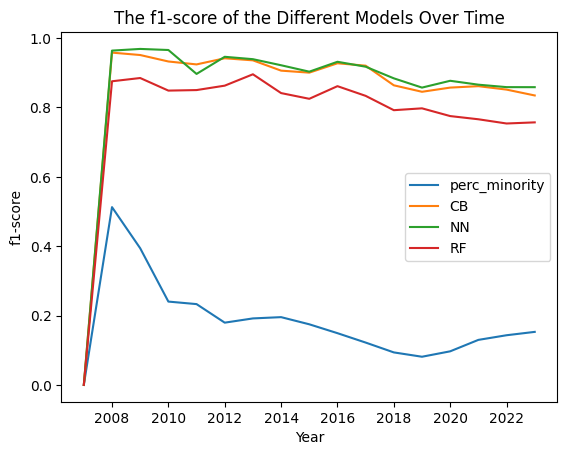

In [129]:
plt.plot(eval_df_all['year'], eval_df_all['perc_minority'], label='perc_minority')

plt.plot(eval_df_all['year'], eval_df_all['f1_score_cb'], label='CB')
plt.plot(eval_df_all['year'], eval_df_all['f1_score_nn'], label='NN')
plt.plot(eval_df_all['year'], eval_df_all['f1_score_rf'], label='RF')


corr_CB, _ = spearmanr(eval_df_all['f1_score_cb'], eval_df_all['perc_minority'])
corr_CB_text = f'Spearman correlation between the f1-score of Catboost and %Minority is: {corr_CB:.3f}'
print(corr_CB_text)

corr_NN, _ = spearmanr(eval_df_all['f1_score_nn'], eval_df_all['perc_minority'])
corr_NN_text = f'Spearman correlation between the f1-score of Neural Network and %Minority is: {corr_NN:.3f}'
print(corr_NN_text)

corr_RF, _ = spearmanr(eval_df_all['f1_score_rf'], eval_df_all['perc_minority'])
corr_RF_text = f'Spearman correlation between the f1-score of Random Forest and %Minority is: {corr_RF:.3f}'
print(corr_RF_text)

print()

plt.xlabel('Year')
plt.ylabel('f1-score')
plt.title('The f1-score of the Different Models Over Time')

# Add a legend
plt.legend()

plt.show()